In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('Karachi100.csv')
# df=np.asarray(df)
# df['Price']=df['Price'].astype()
df_KSE_100=df.copy()
df_KSE_100['Date'] = pd.to_datetime(df_KSE_100['Date'], dayfirst = True)
df_KSE_100.set_index("Date", inplace=True)
df_KSE_100=df_KSE_100.asfreq('b')
df_KSE_100=df_KSE_100.fillna(method='ffill')
df_KSE_100['Price']=df_KSE_100['Price'].str.replace(',',"").astype(float)
df_KSE_100.head()

<ipython-input-37-254fd87c3cfc>:10: UserWarning: Parsing dates in MM/DD/YYYY format when dayfirst=True was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_KSE_100['Date'] = pd.to_datetime(df_KSE_100['Date'], dayfirst = True)


,Price
Date,
2022-01-03,44803.58
2022-01-04,45152.11
2022-01-05,45152.11
2022-01-06,42756.04
2022-01-07,41630.35


In [ ]:
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts

In [ ]:
size = int(len(df_KSE_100)*0.8)
df, df_test = df_KSE_100.iloc[:size], df_KSE_100.iloc[size:]

In [ ]:
model = ARIMA(df,order =(3,2,2))
results = model.fit()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
predictions = results.predict(start=len(df+1), end= len(df)+len(df_test)-1, dynamic=False)
#print(len(predictions))
#for i in range(len(predictions)):
#print('predicted=%f, expected=%f' % (predictions[i], df_test.ftse[i]))
rmse = sqrt(mean_squared_error(df_test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 3409.904


In [ ]:
test=df_test
test['prediction']=predictions


<ipython-input-64-d3fd717f3d84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction']=predictions


In [ ]:
test['difference']=test["Price"]-test['prediction']
print(test)

               Price    prediction   difference
Date                                           
2023-07-20  45426.58  45085.480653   341.099347
2023-07-21  45888.26  45085.491462   802.768538
2023-07-24  46065.55  45085.491324   980.058676
2023-07-25  46399.22  45085.491326  1313.728674
2023-07-26  46724.58  45085.491326  1639.088674
...              ...           ...          ...
2023-12-01  40803.89  45085.491326 -4281.601326
2023-12-04  40126.05  45085.491326 -4959.441326
2023-12-05  41487.58  45085.491326 -3597.911326
2023-12-06  41772.33  45085.491326 -3313.161326
2023-12-07  45581.13  45085.491326   495.638674

[101 rows x 3 columns]


<ipython-input-66-9afb2fd2b618>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['difference']=test["Price"]-test['prediction']


<ipython-input-41-33f6b9833e06>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price']=df['Price'].astype(float)


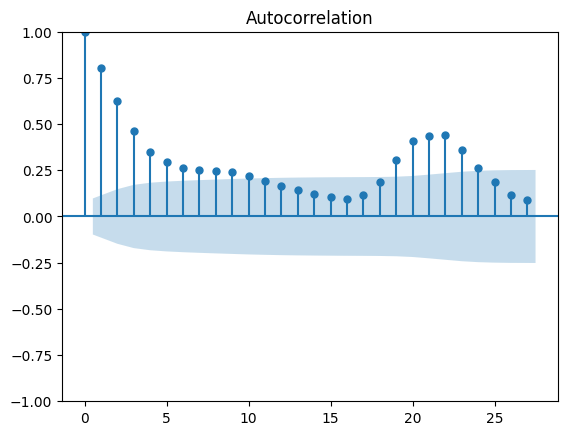

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
df['Price']=df['Price'].astype(float)
plot_acf(df)
plt.show()

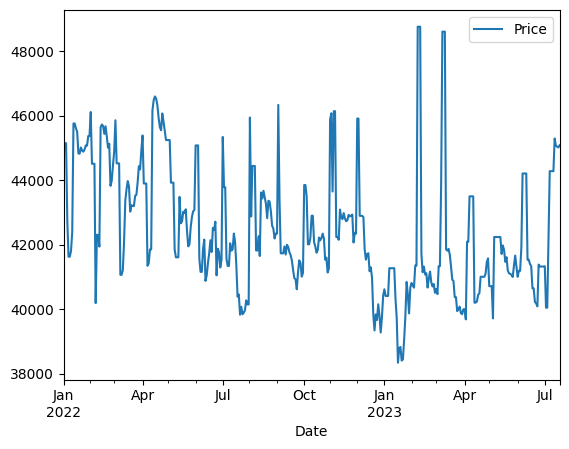

In [ ]:
df.plot()
plt.show()

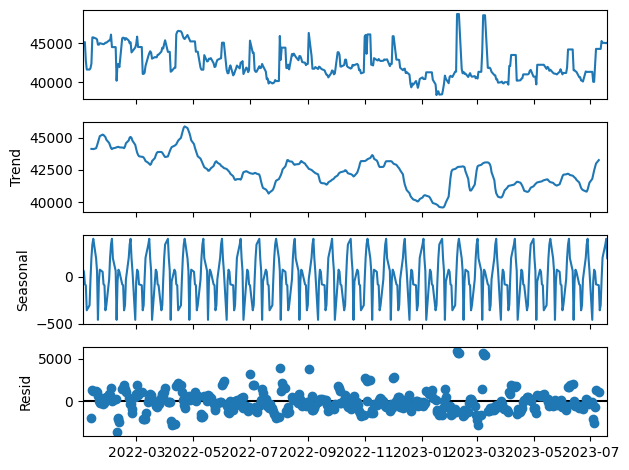

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
series = df
result = seasonal_decompose(series, model='additive',period=14)
result.plot()
pyplot.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))
if result[1]>0.05:
  print('Series is not Stationary')
else:
  print("Series is stationary")

ADF Statistic: -2.358357
p-value: 0.153836
Critical Values:
	1%: -3.447
	5%: -2.869
	10%: -2.571
Series is not Stationary


<Axes: xlabel='Date'>

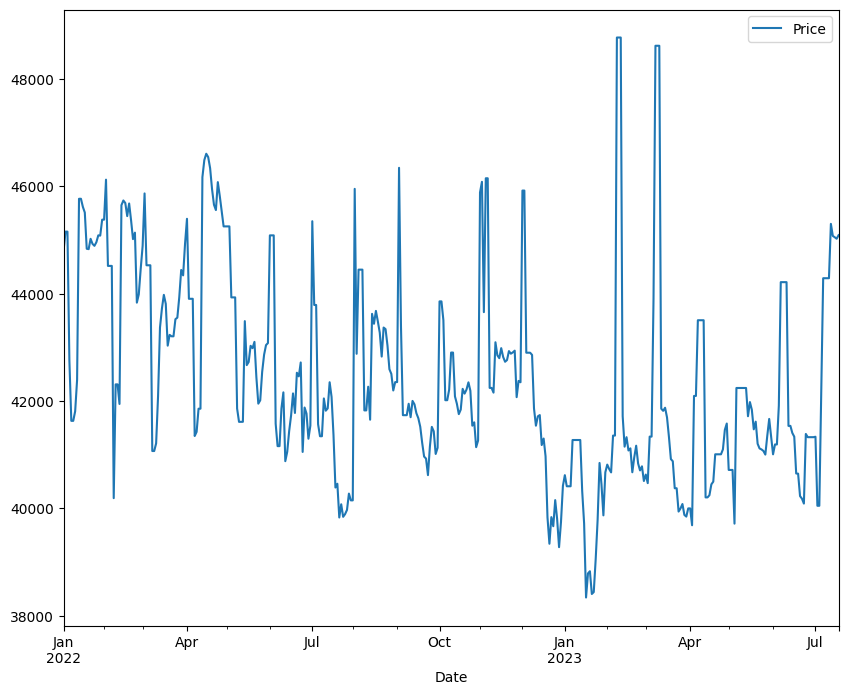

In [ ]:
df.plot(kind='line',figsize=(10,8))
